In [2]:
# Important statistical libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew, probplot
# Some graphing libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression

In [3]:
# Import train dataset into dataframe
train = pd.read_csv('/Users/robertx/Desktop/_/Sophmore-Fall/FA21_Exponent_Project/Data/train.csv')

SalePrice's Skew: 1.8828757597682129; SalePrice's Kurtosis: 6.536281860064529


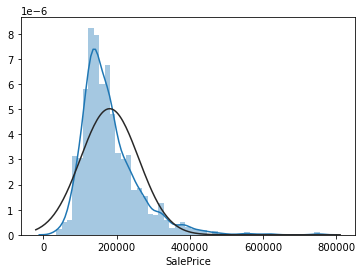

In [4]:
#Exploring Dependent Variables
#Testing the normality of SalePrice
sns.distplot(train.SalePrice,fit=norm)
print(f"SalePrice's Skew: {train.SalePrice.skew()}; SalePrice's Kurtosis: {train.SalePrice.kurt()}")

In [5]:
#Independent Variables-Data Type
#Categorical Variables vs Continuous Variables
#Numerical Variables vs Object Variables
ov = train.columns[train.dtypes == 'object']
nv = train.columns[train.dtypes != 'object']
num_var = pd.DataFrame(nv,columns=['num vars'])
obj_var = pd.DataFrame(ov,columns=['obj vars'])

In [6]:
#Combining Variables
#Combine Bsmt Full Bathrooms with Bsmt Half Bathrooms
train['TotalBsmtBath'] = train['BsmtFullBath']+0.5*train['BsmtHalfBath']
#Combine Above Grade Full Bathrooms with Above Garde Half Bathrooms
train['TotalAGBath'] = train['FullBath'] + 0.5*train['HalfBath']
train['TotalBath'] = train['TotalAGBath'] + train['TotalBsmtBath']
#Calculate Hosue Age (YearSold - YearRemodAdd)
train['HouseAge'] = train['YrSold'] - train['YearRemodAdd']
#Total in house area sqft (garage? LowQualFinSF?)
train['TotalInHouseArea'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
#TotalPorchArea (wooddeck?)
train['TotalPorchArea'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,TotalBsmtBath,TotalAGBath,TotalBath,HouseAge,TotalInHouseArea,TotalPorchArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,1.0,2.5,3.5,5,2566,61
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,0.5,2.0,2.5,31,2524,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,1.0,2.5,3.5,6,2706,42
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,1.0,1.0,2.0,36,2473,307
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,1.0,2.5,3.5,8,3343,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,175000,0.0,2.5,2.5,7,2600,40
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,210000,1.0,2.0,3.0,22,3615,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,266500,0.0,2.0,2.0,4,3492,60
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,2010,WD,Normal,142125,1.0,1.0,2.0,14,2156,112


In [17]:
non_num_vars = [
    'MSZoning', 'LandContour', 'Utilities',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
    'GarageType', 'MiscFeature', 
    'SaleType', 'SaleCondition', 'Alley', 'Street', 'Landslope', 'Mosold', 'Yrsold'
]
rank_vars = [
    'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'Functional', 'GarageFinish', 'PavedDrive', 
    'CentralAir', 'LotShape', 'MSSubClass', 'OverallQual'
]
continuous_vars = [
    'LotFrontage', 'LotArea', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal','TotalInHouseArea'
]
discrete_vars = [
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
    'Fireplaces', 'GarageYrBlt',
    'GarageCars','TotalBath','HouseAge','SalePrice'
]
len(continuous_vars)

16

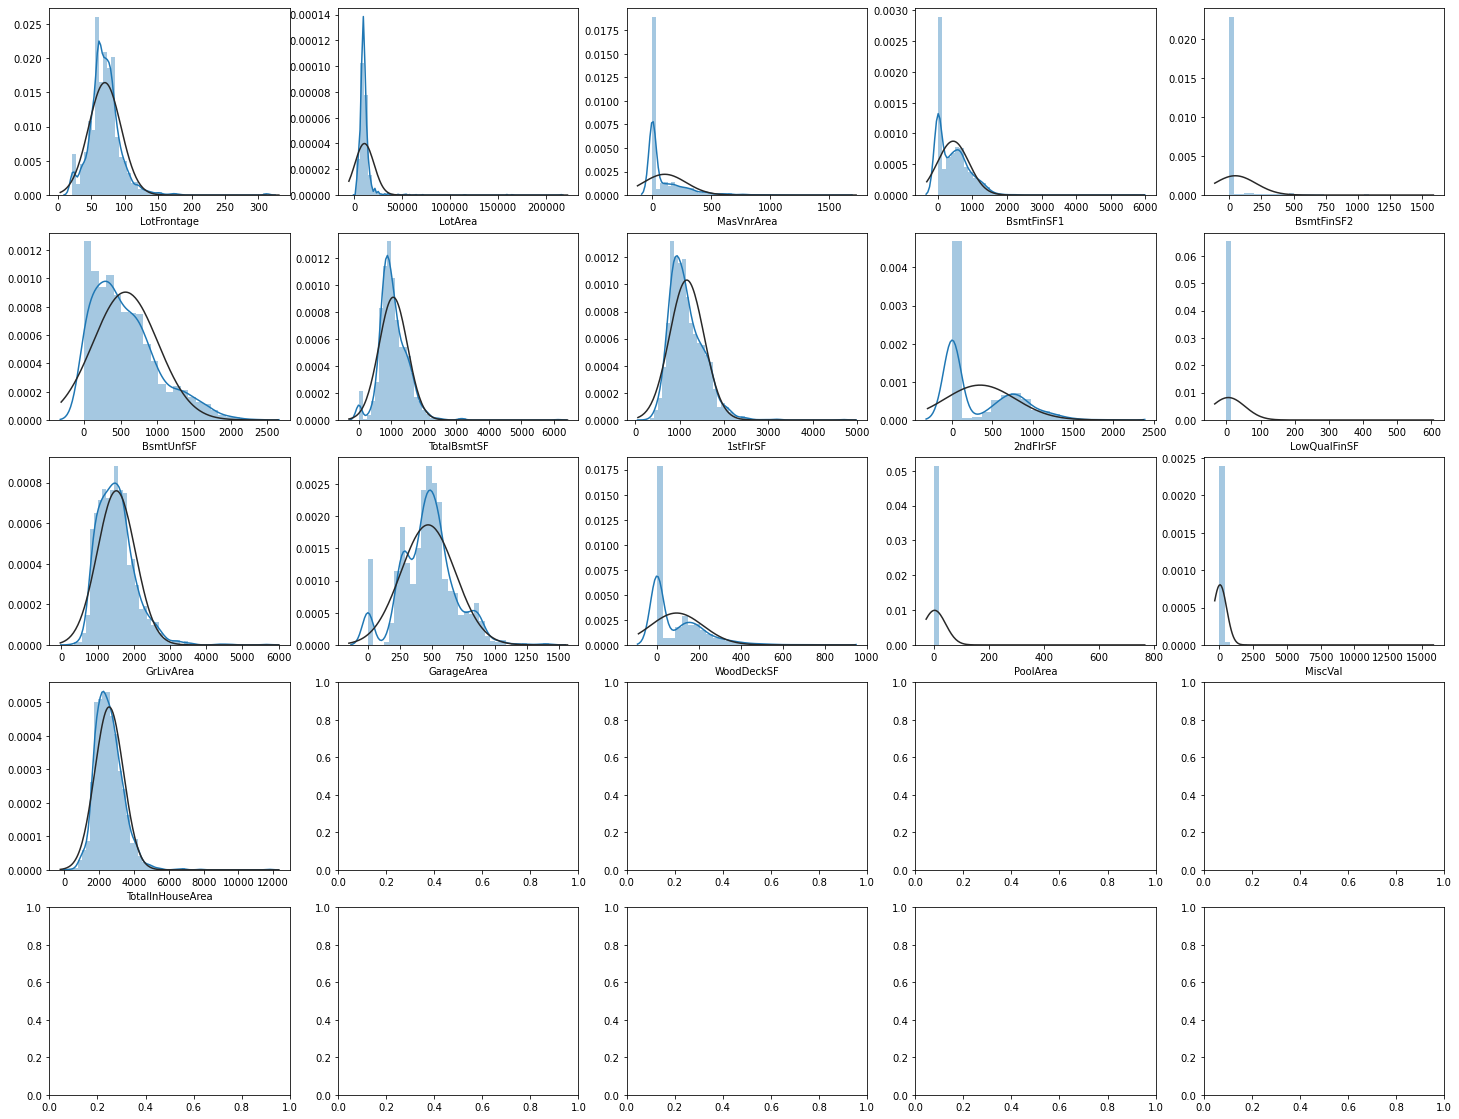

In [18]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(5,5,figsize=(25,20))
for i,x in enumerate(continuous_vars):
    sns.distplot(train[x],fit=norm,ax=ax[i//5,i%5])

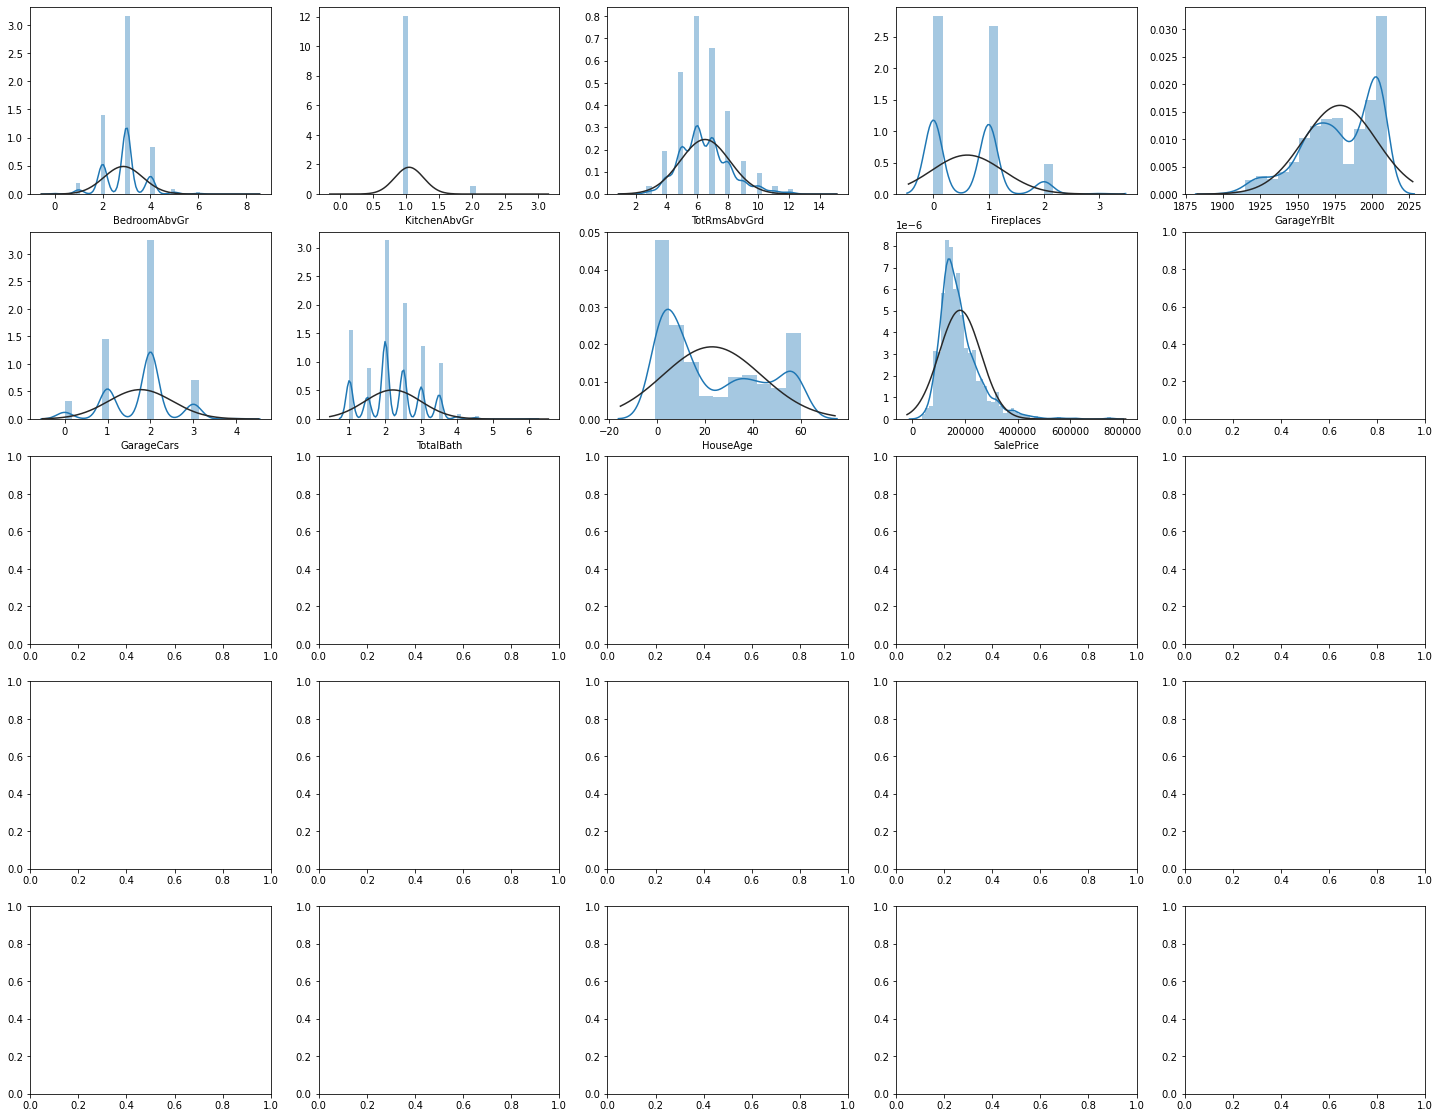

In [19]:
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.subplots(5,5,figsize=(25,20))
for i,x in enumerate(discrete_vars):
    sns.distplot(train[x],fit=norm,ax=ax[i//5,i%5])

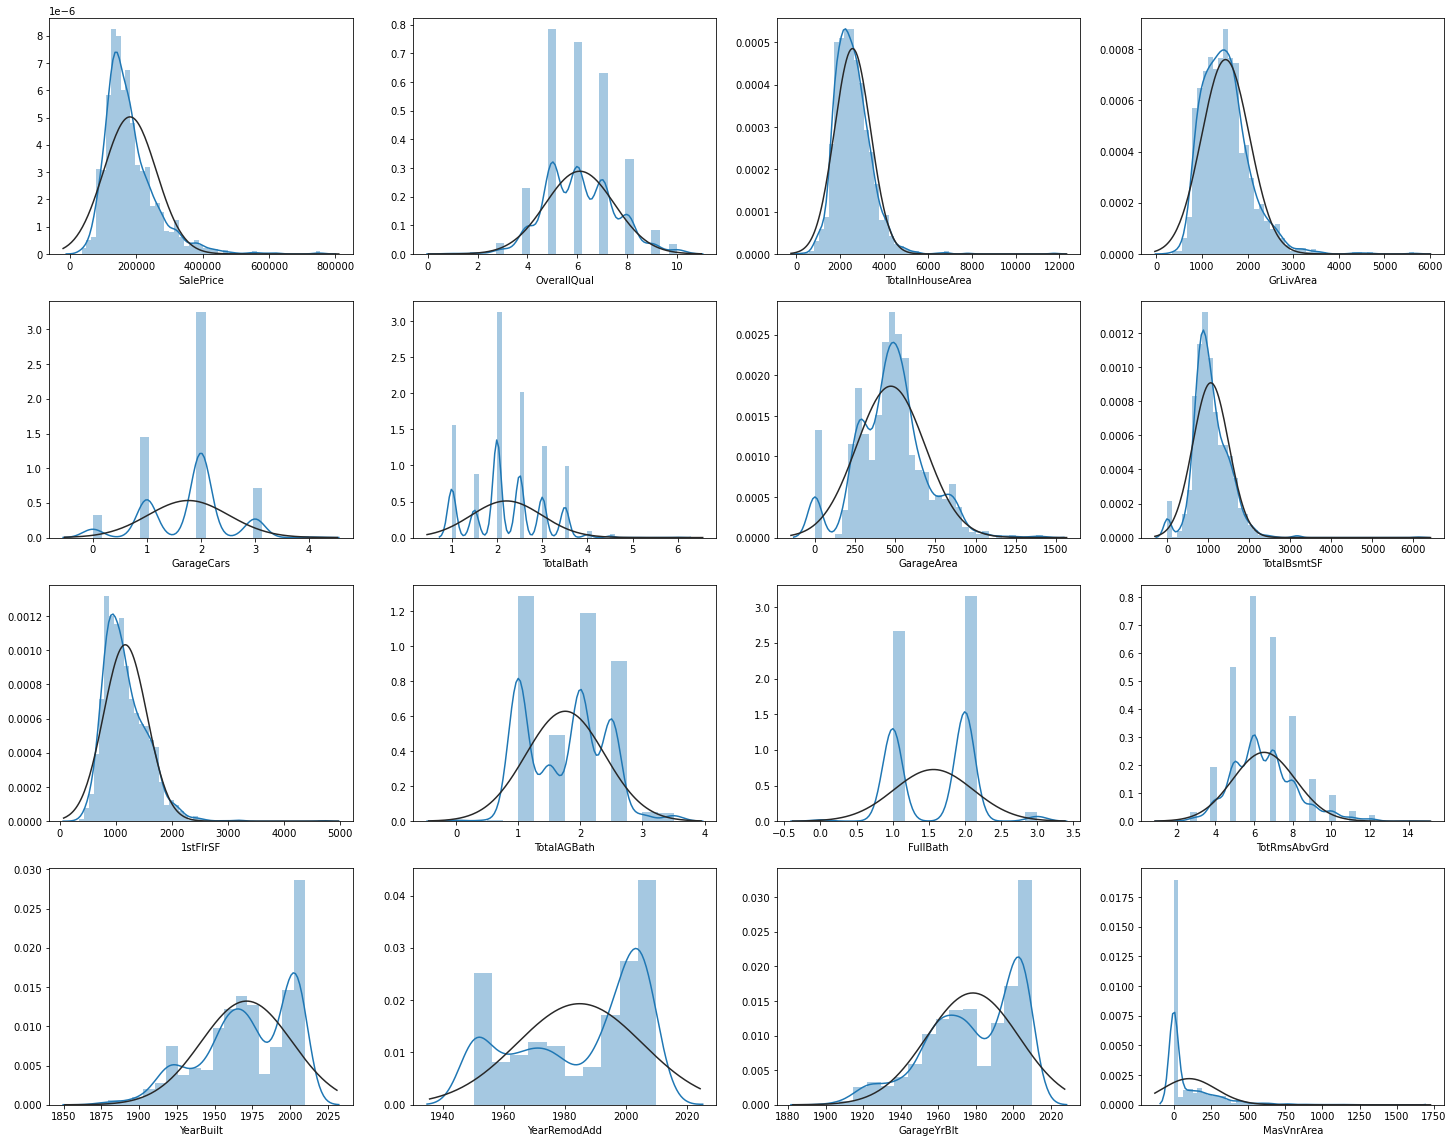

In [20]:
#Distplots of variabels with the highest corr
corrmat = train.corr()
variables = list(corrmat.nlargest(16,'SalePrice')['SalePrice'].index)
fig, ax = plt.subplots(4,4,figsize=(25,20))
for i,x in enumerate(variables):
    sns.distplot(train[x],fit=norm,ax=ax[i//4,i%4])

In [32]:
list(corrmat.nlargest(9,'SalePrice')['SalePrice'].index)

['SalePrice',
 'OverallQual',
 'TotalInHouseArea',
 'GrLivArea',
 'GarageCars',
 'TotalBath',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF']

In [22]:
lreg = LinearRegression()

In [23]:
num_vars = discrete_vars + continuous_vars
num_vars_df = train.loc[:,[i for i in num_vars]]
X_multi = num_vars_df.drop('SalePrice',axis=1)
Y_target = num_vars_df.SalePrice
X_multi = X_multi.apply(pd.to_numeric, errors='coerce')
Y_target = Y_target.apply(pd.to_numeric, errors='coerce')
X_multi.fillna(0, inplace=True)
Y_target.fillna(0, inplace=True)
lreg.fit(X_multi,Y_target)

LinearRegression()

In [24]:
print ('The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print ('The number of coefficients used was %d' %len(lreg.coef_))
print ('The coefficient of determination (R^2) is %.2f'%lreg.score(X_multi,Y_target))

The estimated intercept coefficient is 69317.19 
The number of coefficients used was 24
The coefficient of determination (R^2) is 0.77


In [25]:
coeff_df = pd.DataFrame(num_vars_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,BedroomAbvGr,-11661.073249
1,KitchenAbvGr,-46694.360589
2,TotRmsAbvGrd,6308.453843
3,Fireplaces,8295.430845
4,GarageYrBlt,-11.897152
5,GarageCars,21441.971804
6,TotalBath,10021.195582
7,HouseAge,-580.217762
8,SalePrice,52.030013
9,LotFrontage,0.235466


In [16]:
lreg.score(X_multi,Y_target)

0.7704571673684357

In [38]:
variables = ['OverallQual', 'TotalInHouseArea', 'GrLivArea', 'GarageCars', 'TotalBath', 'GarageArea']
X = train.loc[:,[i for i in variables]]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,train.SalePrice)

In [39]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1095, 6) (365, 6) (1095,) (365,)


In [44]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)
lreg.score(X_train,Y_train)

0.7805537347505888

In [48]:
pred_test = lreg.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(Y_test,pred_test,squared=False))
print(r2_score(Y_test,pred_test))

35946.472965058674
0.7169667789172323


Text(0.5, 1.0, 'Residual Plots')

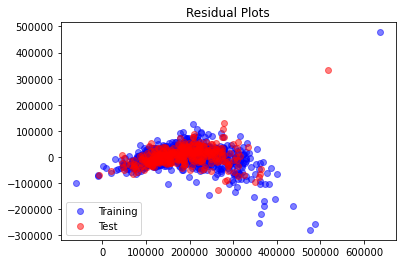

In [47]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=10)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')